# Lab 2 - Intro to Curve Fitting (Scipy/Numpy) and Plotting (Matplotlib)

##  The Photoelectric Effect and Projectile Motion
------------------------------------------------------------------------------------------------

### GitHub:

* Fork the Lab repository to your personal GitHub page.
* Sign into GitHub desktop (using options in the gearwheel) - open the Git Bash shell
* Clone/download the repository to your own directory
* Make a new branch, call it Version-0, this is where you will do your work - I am just learning how important this is!!!
* Save your work to the local machine regularly.
* Commit your work on this branch to GitHub regularly - you don't have to wait until the end of class.
* Remember to make additional branches (Version-1 and Version-2) following each pull request (see below).

### Grading: 
Recall we will be doing the cyclic grading cycle for this assignment.  See the complete syllabus - posted on Moodle - some detailed notes on grading and correcting your work.

Do your work in this file, so it is easy for me to find/grade.  However, there are good reasons to use multiple files in traditional coding projects, so if you have a good reason to want to make a new file, please talk to me about how to make that work.

#### Version-0: 
Before you leave lab today, commit your changes to GitHub, and open a pull request, comparing your forked Version-0 branch back to my original repository.  That's all.

#### Version-1: 
By Monday 9:15am, clean up any unfinished details.  
   * Every code should be well documented with comments.
   * Every graph should be well labeled.  If there is more than one data set or curve, add a legend.
   * Describe each graph with a short paragraph.  What is data plotted, why is it interesting, what model fits that data, is this the model you expect?  Give a written scientific description in complete sentences.
   * Open a pull request on GitHub comparing your forked Version-1 branch back to my original repository.

#### Version-2*: 
After class on Monday, I will post my solution.  
   * Compare our solutions, and look for places you could improve your work 
     * Are your calculations correct?
     * Did you understand (and describe) the physics correctly? 
     * Did you forget anything?
   * Make improvements and comments about your changes.  

\*I called this the Final Version in the syllabus.   

In [1]:
#how to load in plotting to a Jupyter Notebook
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#A note on functions and array arithmetic - 
#several of you have noticed problems using the math module functions on numpy arrays.
#To avoid this problem, use the numpy versions of the functions.  
#For example:
import math
x=math.pi
print(math.sin(x))  #works great - notice what you get - what should you get ? (this is a preview for Ch 4)

x_array = math.pi*np.ones(4) #works fine
print(x_array)                #works fine
#print(math.sin(x_array))     #error
print(np.sin(x_array))        #works fine

1.2246467991473532e-16
[ 3.14159265  3.14159265  3.14159265  3.14159265]
[  1.22464680e-16   1.22464680e-16   1.22464680e-16   1.22464680e-16]


## Part 1: Fitting Millikan's Data w/ Least Squares Method 

Discuss your algorithm with your lab partner.  Since you'll be writing your own code today, you are welcome to disagree on the details.  On your own computer, code it up, following my suggestions from the pre-lab.  As you produce results, use markdown cells to present and describe your work.  *For example add a markdown cell to: describe the plotted data, comment on how good the fit appears, and how it relates to Einstein's model, the percent difference, etc.*

### Your solution to Part 1:
------------------------------------------------------------------------------------------------------------------

[[  5.48740000e+14   5.30900000e-01]
 [  6.93100000e+14   1.08420000e+00]
 [  7.43070000e+14   1.27340000e+00]
 [  8.21930000e+14   1.65980000e+00]
 [  9.60740000e+14   2.19856000e+00]
 [  1.18400000e+15   3.10891000e+00]]


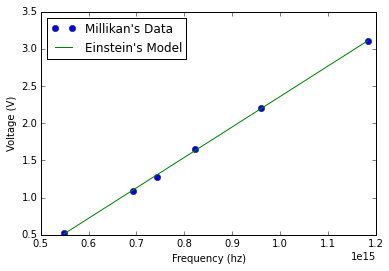

The value of h is:  6.54934022835e-34
The percent error of h is:  1.15695399419 %


In [76]:
#Import block
from numpy import loadtxt, array
import matplotlib.pyplot as plt

#variables
fileName=("millikan.txt")
N=0 #Initializing number of values
e=(1.602*10**-19) #value of an electron
planck=float(6.626*10**-34) #real value of Planck's Constant

#First, we must create an array with the values from the file
dataSet=np.loadtxt(fileName, float)
print(dataSet)
"""print(dataSet[:,0])""" #Produces only the first row of the array

#Produce x_i values and y_i values by slicing from input array
x=dataSet[:,0]
y=dataSet[:,1]
"""print(x)
print(y) test prints"""

#First plot (Note, copied and moved lower down)
#plt.plot(x,y,"o")
#plt.xlabel("Frequency (hz)")
#plt.ylabel("Voltage (V)")
#plt.show()

#Produce the E_sub values
sumEx=sumEy=sumExx=sumExy=N=0
for i in range(x.size):
    sumEx+=x[i]
    sumEy+=y[i]
    sumExx+=x[i]**2
    sumExy+=x[i]*y[i]
    N+=1

Ex=sumEx/N
Ey=sumEy/N
Exx=sumExx/N
Exy=sumExy/N

#Produce m and c from these values
m=(Exy-Ex*Ey)/(Exx-Ex**2)
c=(Exx*Ey-Ex*Exy)/(Exx-Ex**2)

#Produce the y_i values based on the x_i's
y_i=m*x+c

plt.plot(x,y,"o",label="Millikan's Data")
plt.xlabel("Frequency (hz)")
plt.ylabel("Voltage (V)")
plt.plot(x,y_i,"-", label="Einstein's Model")
plt.legend(loc="best")
plt.show()

#Calculation of h values and their average
h=(e/x)*(y_i-c) #based on Einstein's theoretical model
havg=sum(h)/len(h)
print("The value of h is: ",havg)

#Calculate error difference
print("The percent error of h is: ",abs((havg-planck)/planck)*100,"%")

## Part 2: Curve Fitting Tutorial:
Open the Jupyter Notebook CurveFit.ipynb and work through the plots and exercises.  It is a very complete set of information that you should remember to consult for this and other classes.  No need to memorize all of the functions.

You may want to read Part 3 (below) and jump back and forth between the tutorial and applying each step to Millikan's data.

### Submit nothing for this section - However this is a dense document - ask a lot of questions and add comments to the document to help you reuse the functions as you go.  
-----------------------------------------------------------------------------------------------

## Part 3: Fitting Millikan's Data 
Use your new found knowledge from the Curve Fitting Tutorial to fit Millikan's Data with the various fitting routines in the tutorial.  Since it is linear data, it is a great test case to get you started.  Try three cases:
    * polynomial fits
    * linear regression (from the mathematical library scipy)
    * curve fits - even though your data fits a straight line, it is worth trying

To distinguish your new fits from those in part 1, give your new fit coefficients names that match the fit type.  For instance, back in Part 1, I named my coefficients ```m``` and ```b```.  In this section, I named my polynomial fit coefficients ```m_poly```, ```b_poly```.

### Your solution to Part 3:
-----------------------------------------------------------------------------------------------

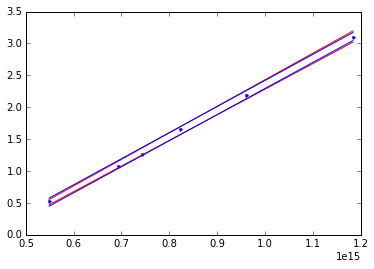

In [74]:
#First, we begin with a polynomial fit
fit, cov = np.polyfit(x, y, 1,cov=True)
cov
m_poly = fit[0]
c_poly = fit[1]
dm_poly = np.sqrt(cov[0,0])
dc_poly = np.sqrt(cov[1,1])
plt.plot(x,y,".")
plt.plot(x,(m_poly+dm_poly)*x + c_poly,"r")
plt.plot(x,(m_poly-dm_poly)*x + c_poly,"r")
plt.plot(x,m_poly*x + c_poly + dc_poly,"b")
plt.plot(x,m_poly*x + c_poly - dc_poly,"b")

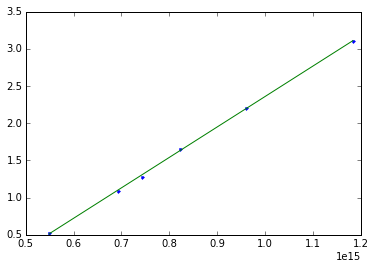

In [85]:
#Now we do the in-built linear way
from scipy.stats import linregress
regresfit = linregress(x,y)
regresfit
m_linear=regresfit[0]
b_linear=regresfit[1]
plt.plot(x,y,".")
plt.plot(x,m_linear*x+b_linear,"-")

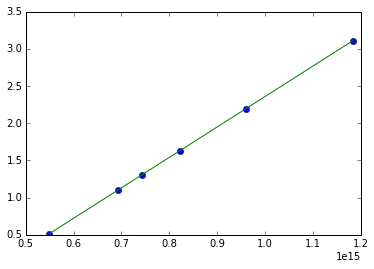

In [89]:
#Now we do the (arbitrary) curve fit
def func(m,x_curve,c):
    return m*x_curve+c

y_curve=func(m_linear,x,b_linear)
plt.plot(x,y_curve,"o")
plt.plot(x,m_linear*x+b_linear,"-")
plt.show()

## Part 4: Fitting Projectile Motion Data

1.  Generate some 1D projectile motion data.  You are encouraged to use the function provided in Weekly Session 2. 

2. Add some "noise" to the data with a random variable. Plot the original function (without noise) and the noisy "data" with the scatter() function.  Use some of the tips/tricks on modifying scatter plots that are linked in Weekly Session 2.
3. Note that you have two plots to make - $x$ vs. $t$ and $v$ vs. $t$. Use this [link](https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py) to learn how to make subplots.

4. Perform a curve fit to your noisy "data" and anaylze the error in the fit (i.e. the difference between the fit result and the original (noiseless) function. Compare the fit parameters to your original parameters using the standard deviation in the fit parameters. How close does the fit get to your original parameters? Repeat the analysis to generate new random data and compare again.

### Your solution to Part 4:
-----------------------------------------------------------------------------------------------

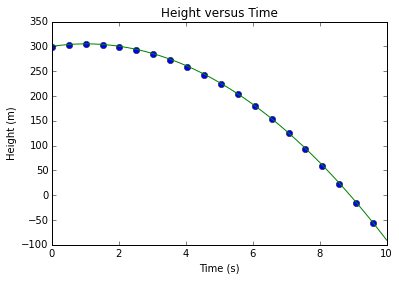

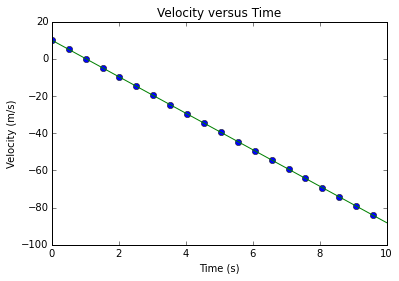

In [138]:
#First we define a position function
def position(t, a, v_i, x_i):
    x=x_i+v_i*t+0.5*a*t**2
    v=v_i+a*t
    return x,v

#Create initial conditions
a1=-9.81 #m/s^2
v1=10  #m/s
x1=300.0 #m
t_time=np.linspace(0,10,100)

#Generate data set
y_time, v_time =position(t_time,a1,v1,x1)
    
#Time to crank up the noise
y_noise=y_time+np.random.randint(-2,2)
v_noise=v_time+np.random.randint(-2,2)

#First, we find the curve fit for height
from scipy.optimize import curve_fit
def func(time, accel, veloc, posit):
    return posit+veloc*time+0.5*accel*time**2, veloc+accel*time

yfit,vfit= func(t_time,a1,v1,x1)

#Now we plot height and velocity on separate graphs
plt.plot(t_time,y_noise,"o",markevery=5)
plt.plot(t_time,yfit,"-")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.title("Height versus Time")
plt.show()
plt.plot(t_time,v_noise,"o",markevery=5)
plt.plot(t_time,vfit,"-")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity versus Time")
plt.show()

## Post lab questions

Describe briefly Millikan's experiment in your own words.  Be sure to explain these two main points.

1.  What is $\nu$, and why is it the independent variable in the experiment?  Did Millikan use $\nu$ in the           visible, infrared, or ultraviolet spectrum?  Here is a [reference](http://hyperphysics.phy-astr.gsu.edu/hbase/ems3.html) for light energies.

$\nu$ was the representative of the frequency of the incoming light, which could be controlled by filtering out other spectra. He used visible light, as evidenced by the powers of 14 appended to the coefficient values.
    
2.  What does $V$ measure, and why is it the dependent variable in the experiment?  

$V$ is the voltage of the field required to completely absorb the photon. If a photon's frequency increased, the potential would have to be similarly increased in order to prevent the emission of an electron.

-----------------------------------------------------------------------------------------------

## With any remaining time 

* Play with "tricking out" your plots using the matplotlib gallery - which is one of my favorite places on the interwebs. Click on the [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py) and use it as a guide to modify your scatter plot.  Once you're done with that, play with the markers as well - you can change their shape! [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py)

* Work on HW6 - which includes finishing all of the exercises in Weekly Session 2